In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("assessment.csv")
df.head()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1287,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,1119,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity


In [3]:
df.shape

(2635, 10)

In [4]:
df.describe()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id
count,2635.000000,2633.000000,2.635000e+03,2635.000000,2635.000000,2633.000000,2633.000000
mean,1251.568880,1.730725,5.815019e+04,91.971157,119.154459,108.876946,389.900494
std,664.557929,1.834539,5.766734e+05,1223.775908,84.336623,379.661037,271.553301
min,3.000000,1.000000,1.000000e+00,1.000000,30.000000,0.000000,0.000000
25%,816.000000,1.000000,2.000000e+02,1.000000,54.000000,0.000000,447.000000
50%,1140.000000,1.000000,1.000000e+03,3.000000,107.000000,0.000000,447.000000
75%,1613.500000,2.000000,4.952000e+03,9.000000,147.000000,0.000000,447.000000
max,2725.000000,10.000000,2.086921e+07,46531.000000,735.000000,2557.000000,2494.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  2635 non-null   int64  
 1   Channel                  2633 non-null   float64
 2   TotalTransactionAmount   2635 non-null   int64  
 3   Tx_Count                 2635 non-null   int64  
 4   DaysSinceLastTrans       2635 non-null   int64  
 5   reseller_id              2633 non-null   float64
 6   superdealer_id           2633 non-null   float64
 7   Product_ServiceProvider  2456 non-null   object 
 8   Product_Type             2456 non-null   object 
 9   Product_Category         2456 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 206.0+ KB


In [6]:
df.isna().sum()

user_id                      0
Channel                      2
TotalTransactionAmount       0
Tx_Count                     0
DaysSinceLastTrans           0
reseller_id                  2
superdealer_id               2
Product_ServiceProvider    179
Product_Type               179
Product_Category           179
dtype: int64

In [7]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
numerical_imputer = SimpleImputer(strategy="mean")
categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Define columns
numerical_features = ["user_id", "Channel", "TotalTransactionAmount",
                      "Tx_Count", "DaysSinceLastTrans", "reseller_id", "superdealer_id"]
categorical_features = ["Product_ServiceProvider", "Product_Type", "Product_Category"]

# Create an imputer(something that fills missing data)
imputer = ColumnTransformer([
    ("numerical_imputer", numerical_imputer, numerical_features),
    ("categorical_imputer", categorical_imputer, categorical_features)
])

# Transform the data
filled_df=imputer.fit_transform(df)
filled_df

array([[1191.0, 8.0, 532700.0, ..., 'Jos Electric', 'Postpaid',
        'Electricity'],
       [1287.0, 1.0, 1635552.0, ..., 'MTN', 'Airtime', 'Telco'],
       [1168.0, 8.0, 548300.0, ..., 'Jos Electric', 'Postpaid',
        'Electricity'],
       ...,
       [49.0, 8.0, 200.0, ..., 'Ikeja Electric', 'Postpaid',
        'Electricity'],
       [49.0, 8.0, 9000.0, ..., 'Eko Electric', 'Prepaid', 'Electricity'],
       [49.0, 1.0, 100.0, ..., 'MTN', 'Airtime', 'Telco']], dtype=object)

In [8]:
df_filled = pd.DataFrame(filled_df,
                        columns=["user_id", "Channel", "TotalTransactionAmount",
                                "Tx_Count", "DaysSinceLastTrans", "reseller_id", 
                                 "superdealer_id", "Product_ServiceProvider", 
                                 "Product_Type", "Product_Category"])
df_filled.head()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191.0,8.0,532700.0,137.0,30.0,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1287.0,1.0,1635552.0,131.0,30.0,0.0,18.0,MTN,Airtime,Telco
2,1168.0,8.0,548300.0,114.0,30.0,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,1119.0,2.0,12200.0,13.0,30.0,0.0,447.0,Airtel,Data,Telco
4,1168.0,8.0,211700.0,75.0,30.0,1130.0,18.0,Jos Electric,Prepaid,Electricity


In [9]:
df_filled.isna().sum()

user_id                    0
Channel                    0
TotalTransactionAmount     0
Tx_Count                   0
DaysSinceLastTrans         0
reseller_id                0
superdealer_id             0
Product_ServiceProvider    0
Product_Type               0
Product_Category           0
dtype: int64

In [10]:
# Turn categorical variables into numbers
for label, content in df_filled.items():
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df_filled[label] = pd.Categorical(content).codes+1

In [11]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user_id                  2635 non-null   int16
 1   Channel                  2635 non-null   int8 
 2   TotalTransactionAmount   2635 non-null   int16
 3   Tx_Count                 2635 non-null   int16
 4   DaysSinceLastTrans       2635 non-null   int16
 5   reseller_id              2635 non-null   int8 
 6   superdealer_id           2635 non-null   int8 
 7   Product_ServiceProvider  2635 non-null   int8 
 8   Product_Type             2635 non-null   int8 
 9   Product_Category         2635 non-null   int8 
dtypes: int16(4), int8(6)
memory usage: 36.2 KB


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  2635 non-null   int64  
 1   Channel                  2633 non-null   float64
 2   TotalTransactionAmount   2635 non-null   int64  
 3   Tx_Count                 2635 non-null   int64  
 4   DaysSinceLastTrans       2635 non-null   int64  
 5   reseller_id              2633 non-null   float64
 6   superdealer_id           2633 non-null   float64
 7   Product_ServiceProvider  2456 non-null   object 
 8   Product_Type             2456 non-null   object 
 9   Product_Category         2456 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 206.0+ KB


In [12]:
df_filled.head(20)

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,237,9,588,100,1,8,2,10,5,3
1,270,1,620,97,1,1,2,11,1,4
2,225,9,590,94,1,8,2,10,5,3
3,206,3,287,13,1,1,11,2,2,4
4,225,9,555,72,1,8,2,10,6,3
5,206,1,454,89,1,1,11,11,1,4
6,233,9,565,98,1,8,2,10,6,3
7,137,1,482,134,1,1,11,6,1,4
8,137,1,504,131,1,1,11,11,1,4
9,314,3,73,9,1,1,11,6,2,4


In [13]:
df_filled.Product_ServiceProvider.value_counts()

11    813
2     700
6     422
1     355
14    179
9      42
4      33
10     32
8      18
3      13
7      13
5      10
12      3
13      2
Name: Product_ServiceProvider, dtype: int64

In [14]:
df_filled.Product_Category.value_counts()

4    2276
6     179
3      99
2      42
1      25
5      14
Name: Product_Category, dtype: int64

In [15]:
df_filled.Product_Type.value_counts()

1    1878
2     398
8     179
6      71
3      42
5      28
4      25
7      14
Name: Product_Type, dtype: int64

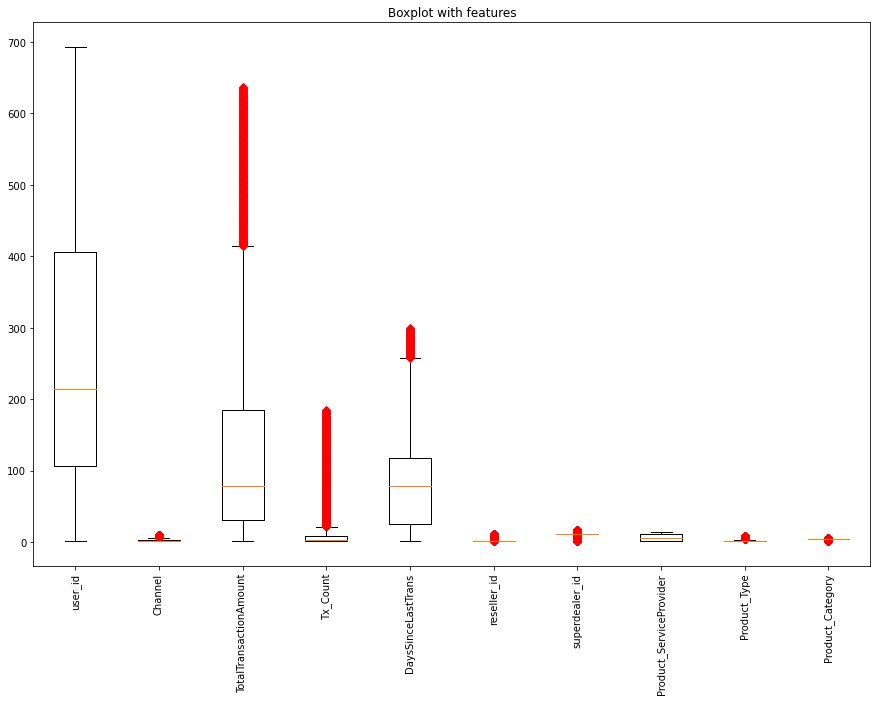

In [16]:
ls_features = list(df_filled.keys())

plt.figure(figsize=(15,10))
plt.title("Boxplot with features")
plt.boxplot(df_filled.values, 0, 'rD', labels=ls_features)
plt.xticks(rotation=90)
plt.show()

In [17]:
df_filled_scaled = StandardScaler().fit_transform(df_filled)

In [18]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(df_filled_scaled)

centroids = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

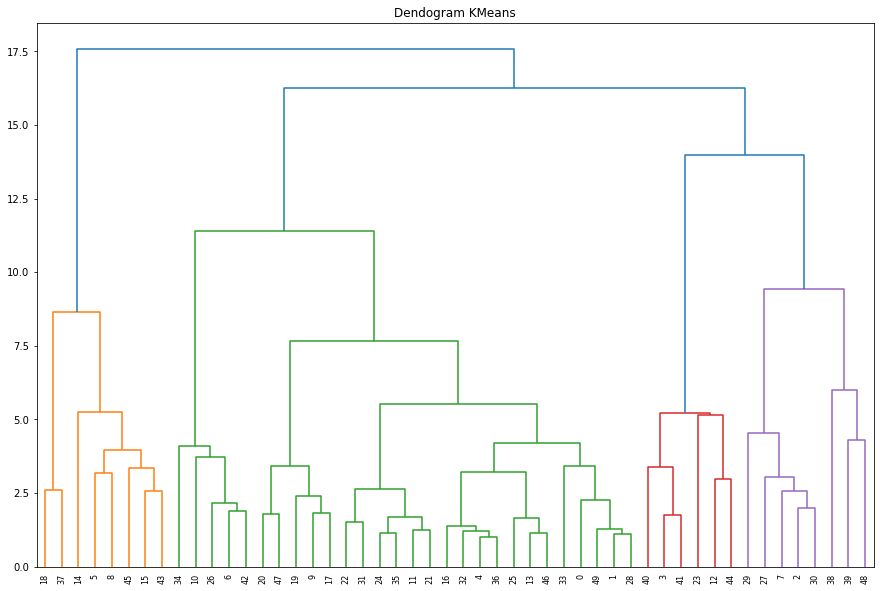

In [19]:
plt.figure(figsize=(15,10))

plt.title('Dendogram KMeans')
Z = linkage(centroids, method='ward', metric='euclidean')
dendrogram(Z, leaf_rotation=90., color_threshold=12)
plt.show()

From the above graph we can see that optimal number of custer will be 4.

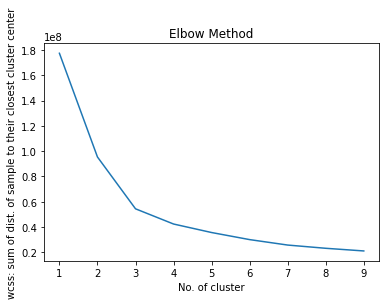

In [20]:
# Finding the optimal number of cluster using Elbow method
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(df_filled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' );

From elbow method also, the optimal number of cluster will be 4.

In [21]:
# Initiating the Agglomerative Clustering model
cluster = AgglomerativeClustering(n_clusters=4)
cluster.fit(centroids)
labels_cluster = cluster.labels_

In [22]:
df_filled_norm = pd.DataFrame(df_filled_scaled)

In [23]:
for i in range(50):
    df_filled_norm.loc[labels_kmeans==i, 'cluster'] = labels_cluster[i]

In [24]:
new_centroids = df_filled_norm.groupby(by='cluster').mean()
new_centroids

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0.0,0.128215,-0.302568,-0.293366,-0.266651,-0.022856,0.002135,0.095272,-0.166661,-0.365432,-0.063659
1.0,-0.678011,3.337837,1.415230,0.523525,0.818937,0.273580,-0.421228,0.199245,1.463198,-2.350545
2.0,-0.483564,-0.258882,1.984264,2.421648,-0.713427,-0.290604,-0.344181,0.138166,-0.148729,0.109856
3.0,-0.289284,0.729441,-0.256650,-0.258023,0.352925,0.066045,-0.309998,1.596198,3.080747,2.804759


In [25]:
kmeans2 = KMeans(n_clusters=4, init=new_centroids)
kmeans2_pred = kmeans2.fit_predict(df_filled_norm.drop("cluster", axis=1))

centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_

C:\Users\oabas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [26]:
kmeans2_pred = pd.DataFrame(kmeans2_pred)
kmeans2_pred= kmeans2_pred.rename(columns = {0: 'Labels'})
kmeans2_pred.head()

,Labels
0,1
1,2
2,1
3,0
4,1


In [27]:
# Initiating PCA to reduce dimentions aka features to 3
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
data_2D = pca.fit_transform(df_filled_norm)
pca_final = pd.DataFrame(data_2D, columns=['X', 'Y', 'Z'])
pca_final.head()

,X,Y,Z
0,4.711733,3.334741,2.294314
1,2.915164,2.543623,2.606641
2,4.666692,3.266657,2.210910
3,0.808228,0.631377,0.596971
4,4.586002,2.675975,1.937270


In [28]:
df_filled_pred = [pca_final, kmeans2_pred]
final_df_filled = pd.concat(df_filled_pred, axis=1)
final_df_filled.head()

,X,Y,Z,Labels
0,4.711733,3.334741,2.294314,1
1,2.915164,2.543623,2.606641,2
2,4.666692,3.266657,2.210910,1
3,0.808228,0.631377,0.596971,0
4,4.586002,2.675975,1.937270,1


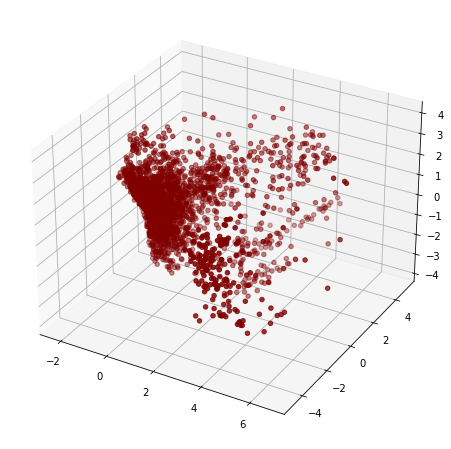

In [33]:
x =final_df_filled["X"]
y =final_df_filled["Y"]
z =final_df_filled["Z"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
plt.show()